# Hotel Booking Cancellation Prediction

!["Image of hotel resort in the mountains with a swimming pool in the foreground"](images/hotel-pool.jpg)

## Overview

This project aims to develop a predictive model that can forecast hotel booking cancellations based on historical data. The model will be trained [this dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) obtained from Kaggle, which contains a large number of hotel reservations made by customers. The primary objective of this project is to build a machine learning model that can accurately predict the likelihood of a hotel booking being cancelled. This information can be valuable for hotels as it allows them to make informed decisions about their inventory management, staff scheduling, and revenue optimization strategies.

The project will involve several steps, including data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation. The performance of the model will be measured using metrics such as accuracy, precision, recall, and F1-score.

Throughout this project, we will also explore the relationships between different variables and their impact on booking cancellations. This will help us to gain insights into the factors that contribute to cancellations and to identify potential areas for improvement. Overall, this project has the potential to provide valuable insights and practical applications for the hospitality industry. By developing a predictive model that can accurately forecast booking cancellations, hotels can better manage their resources, improve customer satisfaction, and increase revenue.

## Business Understanding

The hospitality industry is a highly competitive market, with hotels constantly striving to optimize their revenue and improve customer satisfaction. One of the major challenges faced by hotels is managing cancellations, which can result in lost revenue and reduced occupancy rates.

According to a [recent study](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy), average hotel cancellations have risen to at least 40% of overall bookings. This highlights the need for a predictive model that can accurately forecast booking cancellations. By building a predictive model that can accurately forecast booking cancellations, hotels can take proactive measures to minimize the impact of cancellations on their revenue. For example, they can offer discounts or special promotions to customers who are likely to cancel their bookings, or they can allocate resources more efficiently by adjusting their staff scheduling and inventory management strategies based on the predicted cancellation rates.

Overall, the business value of this project lies in its ability to help hotels improve their revenue optimization strategies, increase customer satisfaction, and reduce the financial impact of booking cancellations. By developing a predictive model that can accurately forecast booking cancellations, hotels can gain a competitive edge in the highly competitive hospitality industry.

## Data Understanding

To achieve this objective, I have utilized the Hotel Reservations [Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) obtained from Kaggle. The dataset contains information about hotel bookings made by customers, including various features such as the number of adults and children, the type of meal plan, the requirement for a car parking space, the type of room reserved, the lead time, the arrival date, the market segment type, and whether the booking was cancelled or not.

The dataset consists of 36,275 rows and 19 columns, with each row representing a unique booking. The target variable will be the `booking_status` column, which indicates whether the booking was cancelled (1) or not (0).

The dataset includes the following features:
- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid")
%matplotlib inline

### Reading the data

In [2]:
# Load data
df = pd.read_csv('data/Hotel-Reservations.csv')
df.head(2)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


### Tidying the data
1. Check data types and figure out which figures are numerical and which are categorical.
2. Check for null values.
3. Check for duplicate values
4. Remove unnecessary columns and missing values

I check for null values in the dataset. There are none.

In [3]:
# Check for missing values
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

I then check for duplicates. There are none. 

In [4]:
# Check for duplicates
df.duplicated().sum()

0

In [5]:
# check the data types
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

 The `repeated_guest` feature is represented as an integer, with 0 indicating that the customer is not a repeated guest and 1 indicating that the customer is a repeated guest. However, the nature of this feature suggests that it is categorical in nature, as it represents a binary classification of customers based on their booking history. Therefore, it is appropriate to treat this feature as a categorical variable in the analysis and modeling process. This also applies to the `required_car_parking_space` feature, which is also represented as an integer.

### Data Preparation

1. Convert `booking_status` to numeric - I will convert 'Canceled' to 1 and 'Not_Canceled' to 0.

In [6]:
# convert values in the column 'booking_status' to 0 and 1
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

2. Convert the rest of the categorical features i.e. `type_of_meal_plan`, `market_segment_type`, `room_type_reserved` to numeric values.

In [7]:
# Check the unique values in type_of_meal_plan, market_segment_type, 
# and room_type_reserved
meal_plans = df['type_of_meal_plan'].unique()
market_segments = df['market_segment_type'].unique()
room_types = df['room_type_reserved'].unique()

# Print unique values
print("Unique values in 'type_of_meal_plan' column:")
print(meal_plans)
print("\nUnique values in 'market_segment_type' column:")
print(market_segments)
print("\nUnique values in 'room_type_reserved' column:")
print(room_types)

Unique values in 'type_of_meal_plan' column:
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Unique values in 'market_segment_type' column:
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Unique values in 'room_type_reserved' column:
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


Next, I convert the categorical features in `type_of_meal_plan`, `market_segment_type`, and `room_type_reserved` to numeric values using `.map()` function because they represent ordinal relationships. 

In [9]:
# Convert values in the type_of_meal_plan to numerical values
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0,
                                                             'Meal Plan 1': 1,
                                                             'Meal Plan 2': 2,
                                                             'Meal Plan 3': 3})

# Convert values in the room_type_reserved to numerical values
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1,
                                                             'Room_Type 2': 2,
                                                             'Room_Type 3': 3,
                                                             'Room_Type 4': 4,
                                                             'Room_Type 5': 5,
                                                             'Room_Type 6': 6,
                                                             'Room_Type 7': 7})


# Convert values in the market_segment_type to numerical values
df['market_segment_type'] = df['market_segment_type'].map({'Offline': 0,
                                                             'Online': 1,
                                                             'Corporate': 2,
                                                             'Complementary': 3,
                                                             'Aviation': 4})

### Data Transformation

First, I'll split the data into train and test sets using the `train_test_split` function from the `sklearn.model_selection` module. This will enable me to estimate how well the model will perform on unseen data later on.

In [10]:
# split dataset into features and target
X = df.drop(['booking_status', 'Booking_ID'], axis=1)
y = df['booking_status']

In [11]:
# split dataset into train and test sets
# set shuffle to True to randomize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=28)

Next, I'll scikit-learn's OneHotEncoder to convert `type_of_meal_plan`, `market_segment_type`, `repeated_guest`, `room_type_reserved`, and `required_car_parking_space` into numerical values.

In [12]:
# Create an instance of OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Create dataframe with only the columns that require One Hot Encoding
categorical_train = X_train[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
                          'market_segment_type', 'repeated_guest']].copy()

categorical_test = X_test[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
                          'market_segment_type', 'repeated_guest']].copy()

# Fit the encoder on the training data and transform it
ohe.fit_transform(categorical_train)

# Transform the test data
ohe.transform(categorical_test)

# Create new dataframes with One Hot Encoded columns
categorical_train_ohe = pd.DataFrame(data=ohe.transform(categorical_train),
                                    columns=ohe.get_feature_names_out(),
                                    index=categorical_train.index)

categorical_test_ohe = pd.DataFrame(data=ohe.transform(categorical_test),
                                   columns=ohe.get_feature_names_out(),
                                   index=categorical_test.index)

Next I'll scale the data using scikit-learn's `StandardScaler`.

In [13]:
# create an instance of StandardScaler
scaler = StandardScaler()

# Create dataframe with only quantitative variables
quant_train = X_train[['arrival_year', 'arrival_month', 'arrival_date','no_of_adults', 'no_of_children', 
                   'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']].copy()

quant_test = X_test[['arrival_year', 'arrival_month', 'arrival_date','no_of_adults', 'no_of_children', 
                   'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']].copy()

# Fit and transform the train data
scaler.fit_transform(quant_train)

# Transform the test data
scaler.transform(quant_test)

# Create new dataframes with Scaler columns
quant_train_scaler = pd.DataFrame(data=scaler.transform(quant_train),
                                  columns=quant_train.columns,
                                  index=quant_train.index)

quant_test_scaler = pd.DataFrame(data=scaler.transform(quant_test),
                                  columns=quant_test.columns,
                                  index=quant_test.index)

In [14]:
# Append encoded and scaled columns to X_train_transformed and X_test_transformed
# Append one hot encoded data back to dataframe
X_train_transformed = pd.concat([quant_train_scaler, categorical_train_ohe], axis=1)

X_test_transformed = pd.concat([quant_test_scaler, categorical_test_ohe], axis=1)

# Preview new dataframe
X_train_transformed.head()

,arrival_year,arrival_month,arrival_date,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,room_type_reserved_7,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,repeated_guest_1
2947,0.46805,-0.136897,-0.642154,0.298216,2.20181,0.218603,-1.550369,-0.991105,-0.062816,-0.086268,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3033,0.46805,-1.758329,1.423318,-1.635357,-0.26098,1.363639,-0.847614,-0.979430,-0.062816,-0.086268,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30081,0.46805,0.835962,-1.101148,0.298216,4.66460,-0.926433,-0.847614,0.304761,-0.062816,-0.086268,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21861,0.46805,-1.434042,-1.330645,0.298216,-0.26098,1.363639,-0.144860,-0.664220,-0.062816,-0.086268,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11680,0.46805,0.835962,-0.986400,0.298216,-0.26098,-0.926433,-0.144860,-0.827662,-0.062816,-0.086268,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Modeling - Baseline Model

First, I'll create a Logistic Regression model using scikit-learn's `LogisticRegression` class. The model will be trained on the `X_train_transformed` and `y_train` data. This baseline model will model the probability of the target variable `booking_status` as a function of the input features, and it can provide insights into the relative importance of each feature in predicting the target.

Here's the criteria I will use to explain the baseline model metrics:

1. Accuracy - The proportion of correct predictions made by the model.
2. Precision - The proportion of true positive predictions out of all the positive predictions made by the model.
3. Recall - The proportion of true positive predictions out of all the actual positive instances. 
4. F1 score - The harmonic mean of precision and recall.
5. ROC AUC score - The area under the ROC curve, which measures the model's ability to distinguish between positive and negative instances.

By evaluating the baseline model using this criteria, we can gain insights into it's performance and identify areas for improvement.

In [15]:
# Fit the logistic regression model using sklearn
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_transformed, y_train)

y_pred_train = logreg.predict(X_train_transformed)
y_pred_test = logreg.predict(X_test_transformed)

# Add a constant to the input features for the intercept
X_train_transformed = sm.add_constant(X_train_transformed)

# Get the coefficients and intercept from the fitted sklearn model
params = np.append(logreg.intercept_, logreg.coef_)

# Calculate the p-values using statsmodels
logit_model = sm.Logit(y_train, X_train_transformed)
result = logit_model.fit(disp=False)

# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27178
Method:                           MLE   Df Model:                           27
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.3300
Time:                        16:36:40   Log-Likelihood:                -11492.
converged:                      False   LL-Null:                       -17153.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.0257      0.079    -25.741      0.000      -2.180      -1.871
arrival_year                             0.1654      

/home/murithi/anaconda3/envs/learn-env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


From the printed summary above, we can see that the following features are insignificant in predicting the target variable: `arrival_date`, `no_of_previous_bookings_not_canceled`, `type_of_meal_plan_2`, `type_of_meal_plan_3`, `room_type_reserved_3`, and  `market_segment_type_3`. Therefore, we can remove these features from our model. This will help to simplify the model, reduce multicollinearity, and improve its performance.

Next, we'll evaluate the performance of our logistic regression model on the training set using scikit-learn's `accuracy_score` and `confusion_matrix` functions. We will calculate the accuracy, precision, AUC score, and the confusion matrix.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

Accuracy is :80.39403072851576

Precision is :73.38494394020289

AUC is :0.76

Confusion Matrix
----------------


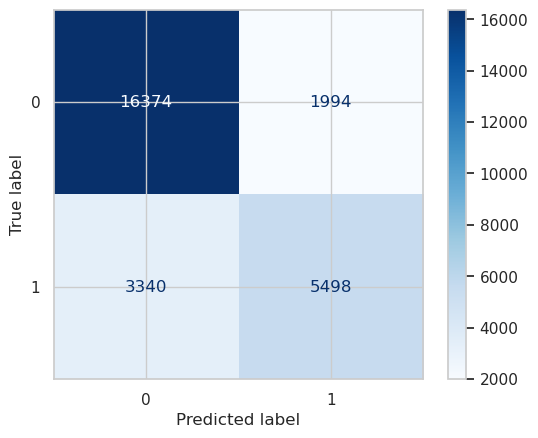

In [18]:
# Evaluation metrics for train set
# Calculate accuracy 
acc = accuracy_score(y_train,y_pred_train) * 100
print('Accuracy is :{0}'.format(acc))

# Calculate precision 
prec = precision_score(y_train,y_pred_train) * 100
print('\nPrecision is :{0}'.format(prec))

# Check the AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create confusion matrix 
print('\nConfusion Matrix')
print('----------------')
cm_train = confusion_matrix(y_train, y_pred_train)

cm_train_disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                      display_labels=logreg.classes_)
cm_train_disp.plot(cmap=plt.cm.Blues);

Accuracy is :80.41680449884221

Precision is :74.73725184896847

AUC is :0.76

Confusion Matrix
----------------


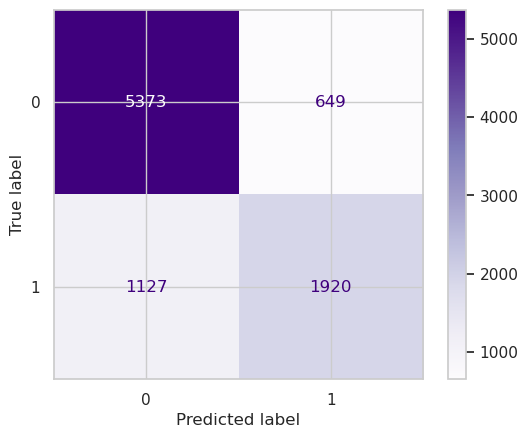

In [20]:
# Evaluation metrics for test set
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred_test) * 100
print('Accuracy is :{0}'.format(acc))

# Calculate precision 
prec = precision_score(y_test,y_pred_test) * 100
print('\nPrecision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
cm_test = confusion_matrix(y_test, y_pred_test)

cm_test_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                      display_labels=logreg.classes_)
cm_test_disp.plot(cmap=plt.cm.Purples);

The results for both the train and test sets are quite similar, which is generally a good sign as it suggests that the model is not overfitting or underfitting. 

- Accuracy: The accuracy values(`80.39%` and `80.42%`) for both the train and test sets are very close, which indicates that the model is performing consistently across different datasets.
- Precision: Precision measures how many of the positive predictions were actually correct. The test set shows slightly better precision of `74.74%` as compared to the train set of `73.38%`, which is a positive sign. However, there is still some room for improvement.
- AUC: Both the train and test sets have the same AUC of `0.76`, which suggests that the model has a reasonable ability to distinguish between the classes, but it's not exceptionally strong.

Overall, I’m moderately satisfied with these results. The model shows consistency between the train and test sets, which is encouraging. However, the performance metrics indicate that there is room for improvement, particularly in precision and AUC.

To further tune the model, I'll be dropping less significant features to improve model performance.

In [21]:
# Drop non-significant features
X_train_transformed = X_train_transformed.drop(['const', 'arrival_date', 'no_of_previous_bookings_not_canceled', 'type_of_meal_plan_2', 
                                               'type_of_meal_plan_3', 'room_type_reserved_3', 'market_segment_type_3'], axis=1)

X_test_transformed = X_test_transformed.drop(['arrival_date', 'no_of_previous_bookings_not_canceled', 'type_of_meal_plan_2', 
                                               'type_of_meal_plan_3', 'room_type_reserved_3', 'market_segment_type_3'], axis=1)

## Hyperparameter Tuning

### Decision Tree Classifier
For the Decision Tree Classifier, I'll be experimenting with different hyperparameters, such as the maximum depth of the tree, the minimum samples required to split an internal node, and the criterion used for splitting nodes. By systematically varying these parameters, I aim to improve the model’s accuracy, precision, and overall effectiveness in classifying data. This process will help ensure that the model generalizes well and performs optimally on unseen data.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Instantiate the decision tree
classifier = DecisionTreeClassifier(criterion='entropy', random_state=28)
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=28)

In [24]:
# Make predictions for train data
y_pred_train = classifier.predict(X_train_transformed)

# Make predictions for test data
y_pred_test = classifier.predict(X_test_transformed)

Next, we'll evaluate the performance of the trained decision tree classifier on the training and test data. Here's the metrics I will use to evaluate the model: Accuracy, Precision, AUC and printing the confusion matrix.

Accuracy is :99.33838123943248

Precision is :99.50823421774932

AUC is :0.99

Confusion Matrix
----------------


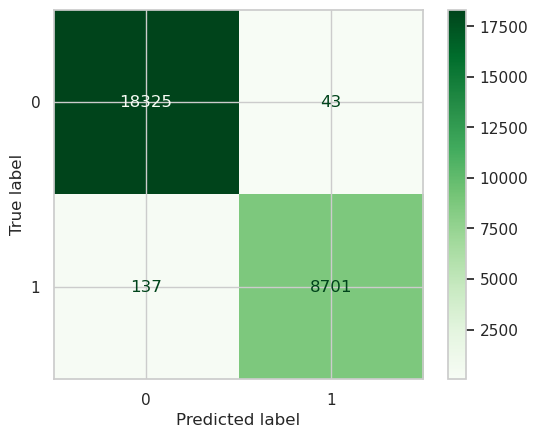

In [25]:
# Evaluate for train set
# Calculate accuracy 
acc = accuracy_score(y_train,y_pred_train) * 100
print('Accuracy is :{0}'.format(acc))

# Calculate precision 
prec = precision_score(y_train,y_pred_train) * 100
print('\nPrecision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
cm_train = confusion_matrix(y_train, y_pred_train)

cm_train_disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                      display_labels=classifier.classes_)
cm_train_disp.plot(cmap=plt.cm.Greens);

Accuracy is :87.16506781343037

Precision is :81.35198135198135

AUC is :0.85

Confusion Matrix
----------------


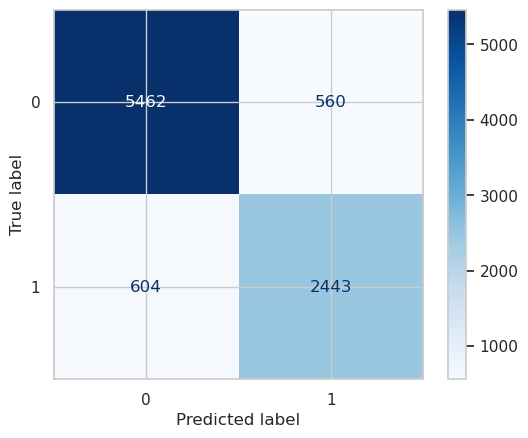

In [26]:
# Evaluate for test set
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred_test) * 100
print('Accuracy is :{0}'.format(acc))

# Calculate precision 
prec = precision_score(y_test,y_pred_test) * 100
print('\nPrecision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
cm_test = confusion_matrix(y_test, y_pred_test)

cm_test_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                      display_labels=classifier.classes_)
cm_test_disp.plot(cmap=plt.cm.Blues);

The metrics printed above indicate that the decision tree classifier performed exceptionally well on the training set, with an **accuracy of 99.34%**, a **precision of 99.51%**, and an **AUC of 0.99**. This suggests that the model is almost perfectly predicting the training data. However, on the test set, the performance drops, with an **accuracy of 87.17%**, a **precision of 81.35%**, and an **AUC of 0.85**. This discrepancy suggests that the model may be overfitting the training data, meaning it has learned to model the training data too well and is not generalizing effectively to unseen data.

I need to boost the precision score since 81% isn’t quite where we want it to be. Our goal is to accurately predict room cancellations so the hotel can manage overselling without risking a lack of space for guests.

In this context, it’s better to have false negatives than false positives. A false positive would mean predicting a guest will cancel when they actually show up, leading to overbooking and potential issues. Conversely, a false negative would involve predicting a guest will keep their reservation, but they end up canceling. Avoiding false positives is crucial to prevent the hotel from overselling and facing a shortage of rooms.

Here are the next steps I'll take o try to improve the performance of the decision tree: 

- Maximum Depth: To reduce overfitting, I’ll limit the tree’s depth. Testing shows that a max depth of 7 provides a good balance, improving precision while keeping accuracy and AUC stable.
- Minimum Samples for Split: Requiring a minimum number of samples to split a node doesn’t improve the model’s performance, so I’ll skip this parameter in the final model.
- Minimum Samples per Leaf: Setting a minimum number of samples for leaf nodes doesn’t enhance the model either, so I’ll exclude it.
- Maximum Features: Limiting the number of features considered during splits also doesn’t add value, so this parameter won’t be included in the final version.

In [27]:
# Identify the optimal tree depth for the train data
acc_train = []
prec_train = []
aucs_train = []

for i in range(1, 31):
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=28)
    classifier.fit(X_train_transformed, y_train)
    y_pred_train = classifier.predict(X_train_transformed)
    
    acc_score = accuracy_score(y_train,y_pred_train) * 100
    
    prec_score = precision_score(y_train,y_pred_train) * 100
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    acc_train.append(acc_score)
    prec_train.append(prec_score)
    aucs_train.append(roc_auc)

In [28]:
# Identify the optimal tree depth for the test data
acc = []
prec = []
aucs = []

for i in range(1, 31):
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=28)
    classifier.fit(X_train_transformed, y_train)
    y_pred_test = classifier.predict(X_test_transformed)
    
    acc_score = accuracy_score(y_test,y_pred_test) * 100
    
    prec_score = precision_score(y_test,y_pred_test) * 100
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    acc.append(acc_score)
    prec.append(prec_score)
    aucs.append(roc_auc)

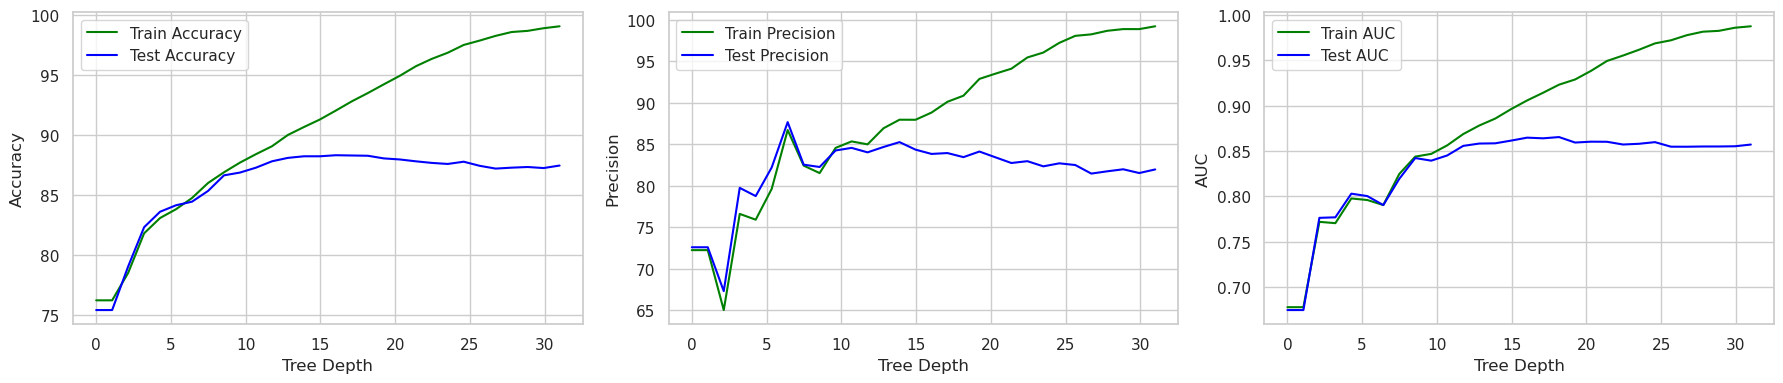

In [30]:
# Create a figure with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

# Plot accuracy for train and test data given various tree depths
ax[0].plot(np.linspace(0, 31, 30), acc_train, label='Train Accuracy', c='green')
ax[0].plot(np.linspace(0, 31, 30), acc, label='Test Accuracy', c='blue')
ax[0].set_xlabel('Tree Depth')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot precision for train and test data given various tree depths
ax[1].plot(np.linspace(0, 31, 30), prec_train, label='Train Precision', c='green')
ax[1].plot(np.linspace(0, 31, 30), prec, label='Test Precision', c='blue')
ax[1].set_xlabel('Tree Depth')
ax[1].set_ylabel('Precision')
ax[1].legend()

# Plot AUC for train and test data given various tree depths
ax[2].plot(np.linspace(0, 31, 30), aucs_train, label='Train AUC', c='green')
ax[2].plot(np.linspace(0, 31, 30), aucs, label='Test AUC', c='blue')
ax[2].set_xlabel('Tree Depth')
ax[2].set_ylabel('AUC')
ax[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()